In [26]:
import tensorflow as tf
import IPython.display as display
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

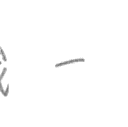

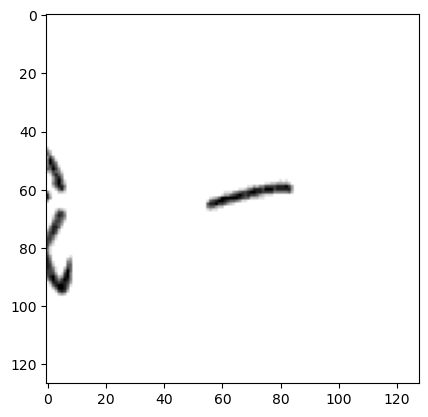

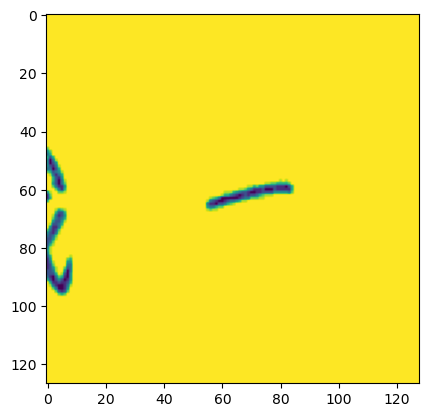

In [32]:
img_path = '/home/ceo/dev/data/ocr_JP/etlcdb-image-extractor/test_dataset/train/0x4e00/000078.png'
# img_path = '001418.jpg'
# img_path = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

# image = tf.image.decode_png(img_path, channels=1)
im = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
im_mplt = imread(img_path,0)
cv2.imshow("piu",im)
display.display(display.Image(filename=img_path))
plt.imshow(im.astype("uint8"),cmap="gray")
plt.show()
plt.imshow(im.astype("uint8"))
plt.show()
# plt.imshow(im_mplt)